# Lets Make Quick Buck !!!!
<style>
* {
  box-sizing: border-box;
}

.column {
  float: left;
  width: 33.33%;
  padding: 5px;
}

/* Clearfix (clear floats) */
.row::after {
  content: "";
  clear: both;
  display: table;
}
</style>
</head>
<body>

<div class="row">
  <div class="column">
    <img src="python.png" alt="Snow" style="width:100%">
  </div>
  <div class="column">
    <img src="stock.jpg" alt="Forest" style="width:100%">
  </div>
  <div class="column">
    <img src="bean.jpeg" alt="Mountains" style="width:100%">
  </div>
</div>

</body>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import quandl
import datetime
from sklearn import preprocessing
from sklearn import cross_validation
style.use('ggplot')
%matplotlib inline

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Machine Learning Flow
<img src="ml.png" alt="ml_flow" style="width:100%;height:600px;">

In [32]:
df = quandl.get("NSE/NTPC")

In [33]:
df = df.reset_index()
df = df.dropna()
print(df.head())
print(df.tail())

        Date   Open   High    Low   Last  Close  Total Trade Quantity  \
0 2004-11-05  88.00  88.00  70.00  75.55  75.55           232535736.0   
1 2004-11-08  76.80  78.60  75.00  75.15  75.20            68865277.0   
2 2004-11-09  75.10  76.10  74.55  75.25  75.30            37460886.0   
3 2004-11-10  75.50  75.95  75.00  75.05  75.05            17413433.0   
4 2004-11-11  75.35  75.40  74.30  74.60  74.45            15961426.0   

   Turnover (Lacs)  
0        170036.32  
1         52940.24  
2         28202.36  
3         13115.85  
4         11930.37  
           Date    Open    High     Low    Last   Close  Total Trade Quantity  \
3510 2018-12-31  149.80  150.05  148.10  148.70  149.05             4175741.0   
3511 2019-01-01  148.95  149.60  146.40  148.80  148.70             3342569.0   
3512 2019-01-02  147.95  148.70  146.15  146.65  147.00             4334233.0   
3513 2019-01-03  147.00  147.40  142.85  144.10  143.40             5862736.0   
3514 2019-01-04  143.95  146.3

In [35]:
prices = df['Close'].tolist()
dates = df.index.tolist()

#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

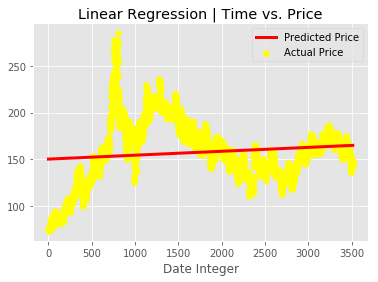

150.24521367709204 0.004174583316113124 150.2368645104598


In [42]:
#Define Linear Regressor Object
regressor = LinearRegression()
regressor.fit(dates, prices)

#Visualize Results
plt.scatter(dates, prices, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, regressor.predict(dates), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Predict Price on Given Date
date = 2
predicted_price =regressor.predict(date)
print(predicted_price[0][0],regressor.coef_[0][0] ,regressor.intercept_[0])

<h2> Model Building & Testing Methodology </h2>
<img src="train_test.png" alt="Train & Test Methodology" >
<h2> Linear Regression "Remembered the image in school </h2>
<img src = "lin_reg.jpg" alt = "Lin-Regression">

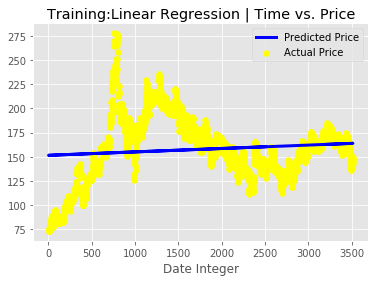

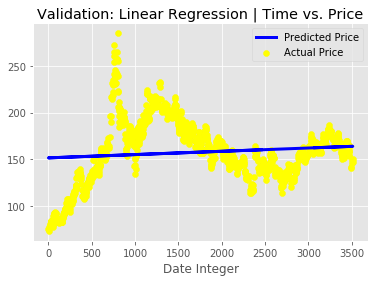

In [43]:
#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.33, random_state=42)
regressor.fit(xtrain, ytrain)

#Train Set Graph
plt.scatter(xtrain, ytrain, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Training:Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Test Set Graph
plt.scatter(xtest, ytest, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Validation: Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

In [38]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, y, test_size=test_size) #cross validation 

    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response

In [39]:
forecast_col = 'Close'#choosing which column to forecast
forecast_out = 5 #how far to forecast 
test_size = 0.2#the size of my test set

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size)

In [40]:
learner = LinearRegression(); #initializing linear regression model

learner.fit(X_train,Y_train); #training the linear regression model
score=learner.score(X_test,Y_test);#testing the linear regression model

forecast= learner.predict(X_lately); #set that will contain the forecasted data

response={};#creting json object
response['test_score']=score; 
response['forecast_set']=forecast;

print(response)

{'test_score': 0.9610385433660822, 'forecast_set': array([149.37045684, 149.02932413, 147.37239381, 143.8636002 ,
       146.1540627 ])}
